# MICROSOFT MOVIE STUDIO ANALYSIS

Microsoft is venturing into the world of original video content creation and aims to establish a new movie studio. The goal of this project is to conduct exploratory data analysis (EDA) to understand what types of films are currently thriving at the box office. By analyzing ratings data from IMDb, we aim to provide actionable insights to guide Microsoft's new movie studio in making informed decisions regarding the types of films they should create.

We have selected four datasets to conduct a comprehensive analysis for Microsoft's new movie studio. Each dataset provides unique and valuable information that, when combined, will offer a holistic understanding of the factors influencing a movie's success at the box office.

NOW, let's begin the Exploratory Data Analysis (EDA). Here are the steps we'll take:

1. Load and explore each of the selected datasets to understand their contents.
2. Clean and preprocess the data as needed.
3. Merge the datasets to create a comprehensive dataset for analysis.

# 1. Load and explore each of the selected datasets  

In [79]:
#Import relevant libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

%matplotlib inline

In [80]:
# Define the file path
tmdb_path = "C:\\Users\\Beryl\\Downloads\\zippedData\\tmdb.movies.csv"

# Load the dataset
tmdb_df = pd.read_csv(tmdb_path, index_col=0)

# Display the first few rows of the dataset
tmdb_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [81]:
tmdb_df.tail()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


In [82]:
tmdb_df.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

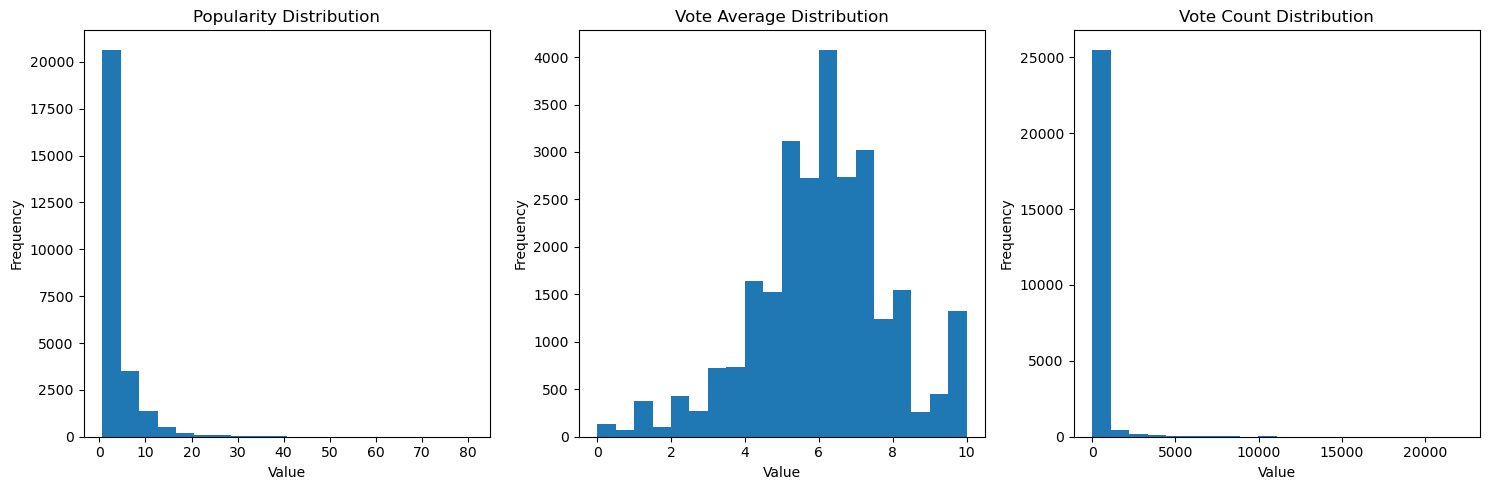

In [83]:
#Let's create histograms for the distributions of popularity, vote_average, and vote_count
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot histograms
tmdb_df['popularity'].plot(kind='hist', ax=axes[0], bins=20, title='Popularity Distribution')
tmdb_df['vote_average'].plot(kind='hist', ax=axes[1], bins=20, title='Vote Average Distribution')
tmdb_df['vote_count'].plot(kind='hist', ax=axes[2], bins=20, title='Vote Count Distribution')

# Set labels
for ax in axes:
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

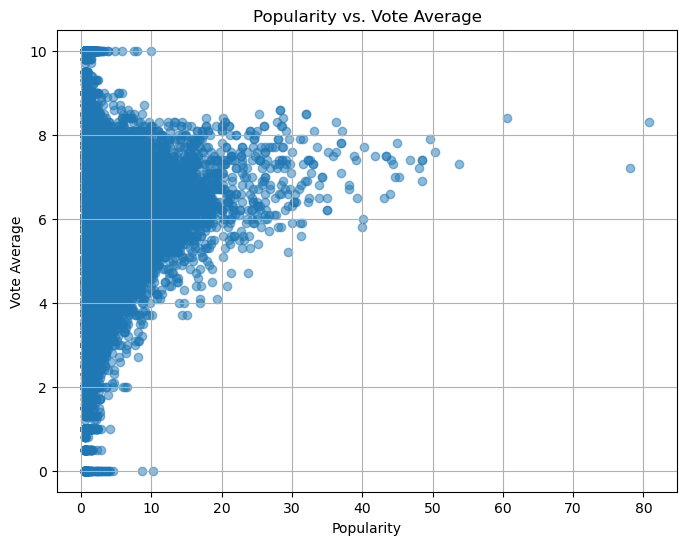

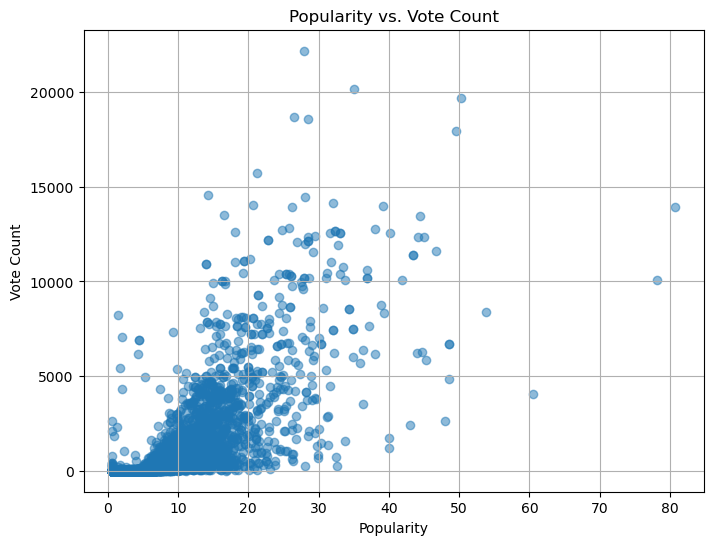

In [84]:
# Let's create a scatter plot to explore the relationships between popularity', 'vote_ count' and 'vote_average'

# Scatter plot of popularity vs. vote_average
plt.figure(figsize=(8, 6))
plt.scatter(tmdb_df['popularity'], tmdb_df['vote_average'], alpha=0.5)
plt.title('Popularity vs. Vote Average')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.grid(True)
plt.show()

# Scatter plot of popularity vs. vote_count
plt.figure(figsize=(8, 6))
plt.scatter(tmdb_df['popularity'], tmdb_df['vote_count'], alpha=0.5)
plt.title('Popularity vs. Vote Count')
plt.xlabel('Popularity')
plt.ylabel('Vote Count')
plt.grid(True)
plt.show()

In [117]:
# Define the file path for the database
imdb_db_path = "C:\\Users\\Beryl\\Downloads\\zippedData\\im.db"

# Connect to the database
conn = sqlite3.connect(imdb_db_path)

# Create a cursor object to execute SQL queries
cur = conn.cursor()

# Execute an SQL query to get the list of tables
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all the table names
tables = cur.fetchall()

# Print out the table names
for table in tables:
    print(table[0])

movie_basics
directors
known_for
movie_akas
movie_ratings
persons
principals
writers


In [86]:
# Execute a query to retrieve data from a specific table
cur.execute("SELECT * FROM movie_ratings").fetchone()

('tt10356526', 8.3, 31)

In [118]:
#Write Sql query that prints all columns in movie_basics table
query = """
SELECT *
FROM movie_basics
"""

#Put the information on the movie_basics table in a pandas dataframe
movie_basics_df = pd.read_sql(query, conn)
movie_basics_df #Print out the pandas dataframe

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [88]:
#Write Sql query that prints all columns in movie_ratings table
query = """
SELECT *
FROM movie_ratings
"""

#Put the information on the movie_ratings table in a pandas dataframe
movie_ratings_df = pd.read_sql(query, conn)
movie_ratings_df #Print out the pandas datafram

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


We are going to create a bar chart that will help us visualize the trends in the number of movies released for different genres over time. The x-axis represents the years, while the y-axis shows the count of movies released in each genre. The legend identifies each genre based on its genre ID.

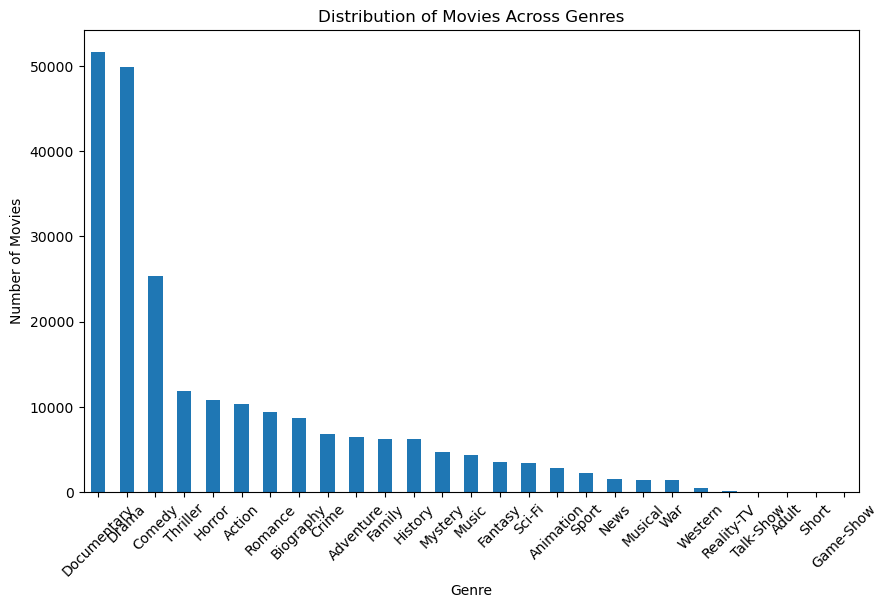

In [89]:
#Retrieve the 'start_year' and 'genres' columns from the movie_basics table
movie_basics_df = pd.read_sql_query("SELECT start_year, genres FROM movie_basics", conn)

#Preprocess the data to extract individual genres
movie_basics_df['genres'] = movie_basics_df['genres'].str.split(',')
movie_genres_df = movie_basics_df.explode('genres')

#Perform genre analysis and create visualizations using a bar chart to show the distribution of movies across different genres
genre_counts = movie_genres_df['genres'].value_counts()
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Distribution of Movies Across Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

In the cell below; we're using a box plot to display the distribution of average ratings. The box represents the interquartile range (IQR), with the median marked by a horizontal line inside the box. Any points outside of the whiskers are considered potential outliers.

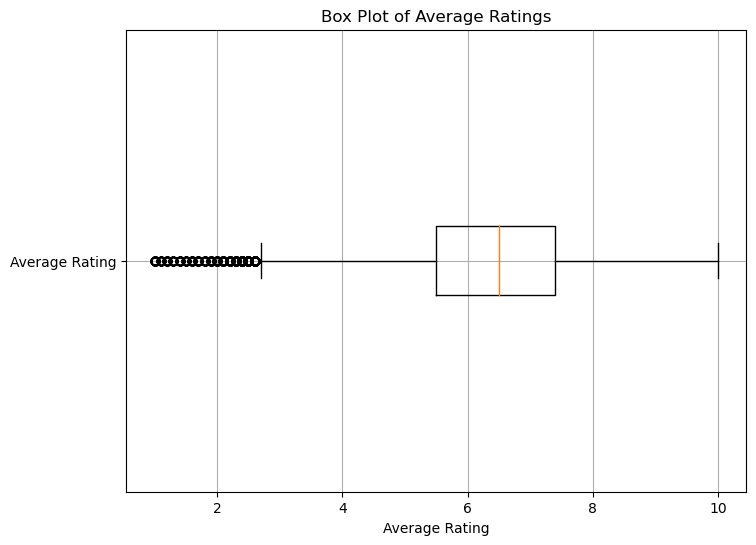

In [90]:
# Box plot of averagerating
plt.figure(figsize=(8, 6))
plt.boxplot(movie_ratings_df['averagerating'], vert=False, labels=['Average Rating'])
plt.title('Box Plot of Average Ratings')
plt.xlabel('Average Rating')
plt.grid(True)
plt.show()

In [91]:
# Define the file path for bom.movie_gross.csv
bom_gross_path = "C:\\Users\\Beryl\\Downloads\\zippedData\\bom.movie_gross.csv"

# Load the dataset
bom_gross_df = pd.read_csv(bom_gross_path)

# Display the first few rows of the dataset
bom_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [92]:
bom_gross_df.shape

(3387, 5)

In [93]:
bom_gross_df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

Finally, let us compare the performance of different studios in terms of domestic gross revenue. 

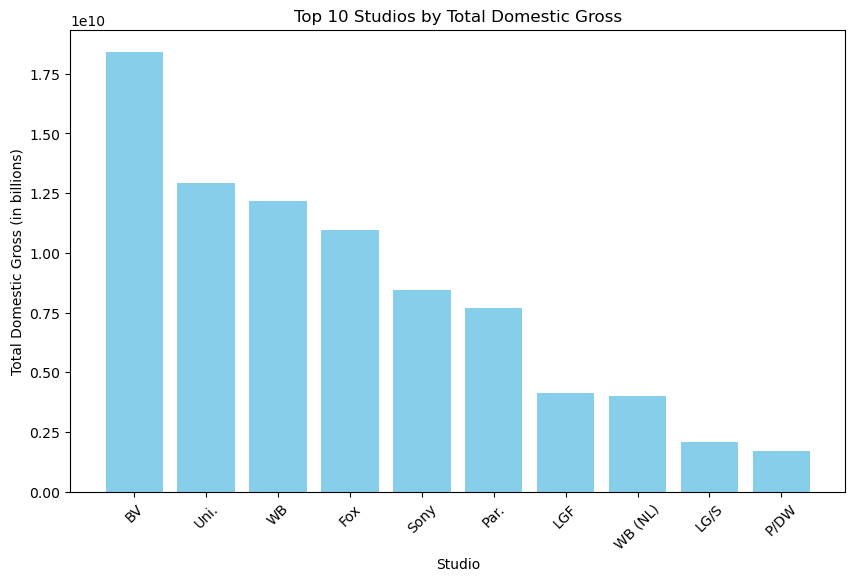

In [94]:
# Group data by studio and calculate total domestic gross revenue for each studio
studio_performance = bom_gross_df.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False).head(10)

# Create a bar chart for studio performance
plt.figure(figsize=(10, 6))
plt.bar(studio_performance.index, studio_performance.values, color='skyblue')
plt.title('Top 10 Studios by Total Domestic Gross')
plt.xlabel('Studio')
plt.ylabel('Total Domestic Gross (in billions)')
plt.xticks(rotation=45)
plt.show()

In [95]:
# Define the file path for tn.movie_budgets.csv
movie_budgets_path = "C:\\Users\\Beryl\\Downloads\\zippedData\\tn.movie_budgets.csv"

# Load the dataset
movie_budgets_df = pd.read_csv(movie_budgets_path, index_col=0)

# Display the first few rows of the dataset
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [96]:
movie_budgets_df.columns

Index(['release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In the cell below;We are going to create a bar chart to display the top-grossing movies based on worldwide gross revenue. This can highlight the highest performing movies in terms of revenue.We first sort the DataFrame by worldwide gross revenue in descending order and select the top 10 movies. Then, we create a horizontal bar chart to display the top-grossing movies along with their corresponding worldwide gross revenue.

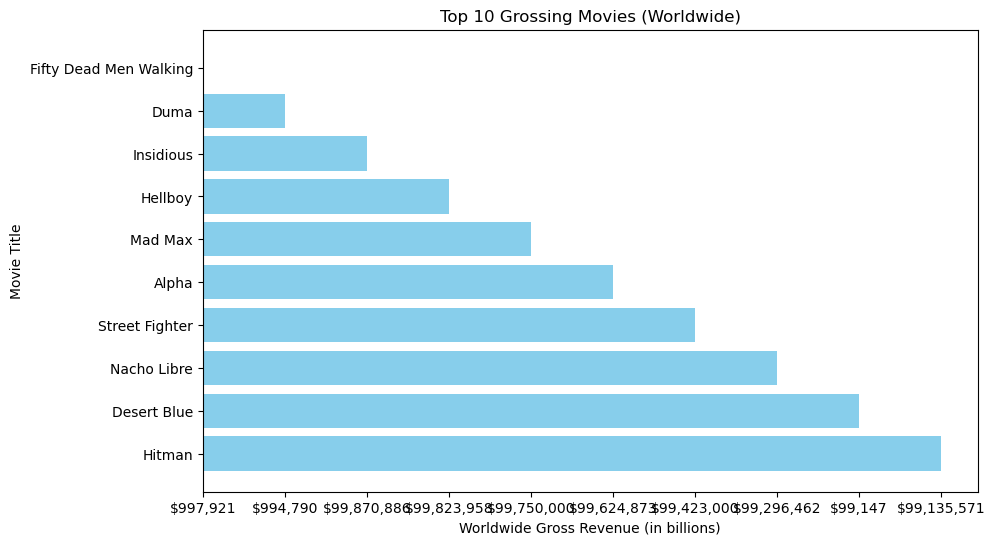

In [97]:
# Sort the DataFrame by worldwide gross in descending order
top_grossing_movies = movie_budgets_df.sort_values(by='worldwide_gross', ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_grossing_movies['movie'], top_grossing_movies['worldwide_gross'], color='skyblue')
plt.title('Top 10 Grossing Movies (Worldwide)')
plt.xlabel('Worldwide Gross Revenue (in billions)')
plt.ylabel('Movie Title')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

Let us plot the production budget against box office revenue over time to analyze the relationship between budget and financial success. We will us the worlswide_gross and production_budget column from the movie_budgets_df.

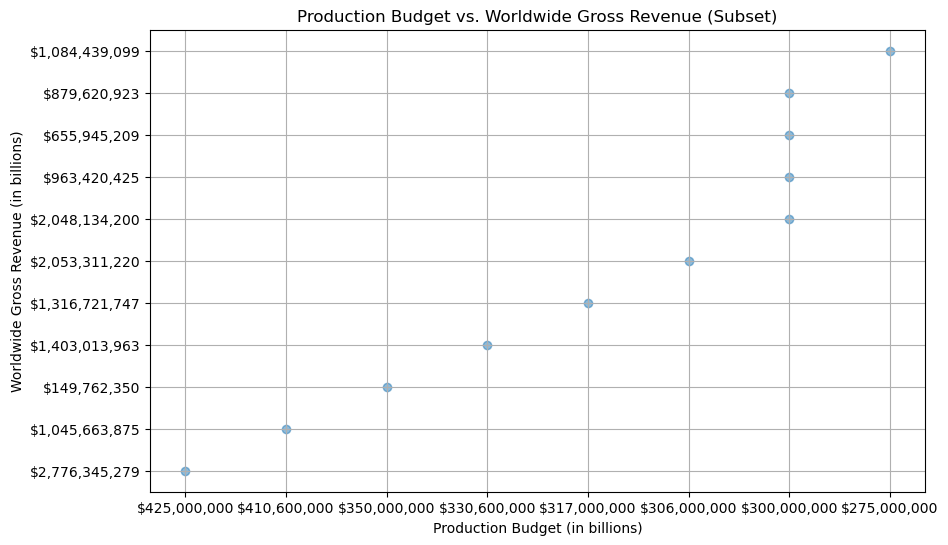

In [98]:
# Convert release_date to datetime format
movie_budgets_df['release_date'] = pd.to_datetime(movie_budgets_df['release_date'], errors='coerce')

# Select a portion of the data (for example, the first 0.2%)
subset_movie_budgets_df = movie_budgets_df.iloc[:int(len(movie_budgets_df)*0.002)]

# Create a scatter plot of production budget vs. worldwide gross revenue using the subset
plt.figure(figsize=(10, 6))
plt.scatter(subset_movie_budgets_df['production_budget'], subset_movie_budgets_df['worldwide_gross'], alpha=0.5)
plt.title('Production Budget vs. Worldwide Gross Revenue (Subset)')
plt.xlabel('Production Budget (in billions)')
plt.ylabel('Worldwide Gross Revenue (in billions)')
plt.grid(True)
plt.show()

# 2. Clean and preprocess the data 

In the pursuit of valuable insights, one of the foundational steps in any data-driven endeavor is the process of data cleaning and preparation. This critical phase ensures that the data we work with is accurate, reliable, and well-structured, setting the stage for meaningful analysis and informed decision-making.

For this Microsoft movie studio project, our data cleaning efforts will focus on three primary datasets: tmdb.movies.csv, tn.movie_budgets.csv, and bom.movie_gross.csv. These datasets provide a wealth of information regarding the film industry, from budgeting and financial performance to critical reception.

In [99]:
#tmdb.movies.csv:
#Check for missing values.
#Identify any columns with irrelevant or redundant information.
tmdb_df.isnull().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [100]:
tmdb_df.duplicated(['id']).sum()

1020

In [101]:
# Check for exact duplicates in the DataFrame
exact_duplicates = tmdb_df[tmdb_df.duplicated(['id'])]

# Display the exact duplicates (if any)
print(exact_duplicates)

                    genre_ids      id original_language  \
2473          [16, 35, 10751]     862                en   
2477          [16, 35, 10751]     863                en   
2536            [12, 28, 878]   20526                en   
2673              [18, 10749]   46705                en   
2717   [35, 18, 14, 27, 9648]   45649                en   
...                       ...     ...               ...   
26481                [35, 18]  270805                en   
26485                [27, 53]  453259                en   
26504            [27, 35, 27]  534282                en   
26510                    [99]  495045                en   
26511                    [99]  492837                en   

               original_title  popularity release_date  \
2473                Toy Story      28.005   1995-11-22   
2477              Toy Story 2      22.698   1999-11-24   
2536             TRON: Legacy      13.459   2010-12-10   
2673           Blue Valentine       8.994   2010-12-29   
2

We will keep the duplicated values

We perform a Comparative Analysis and compare the performance of movies from different studios, genres, or release years. In the cell below, we're performing a Comparative Analysis by Studio. We're grouping the data by 'studio' and calculating the total domestic gross for each studio. We then create a bar chart to visualize the performance of the top 10 studios based on total domestic gross.

In [102]:
#bom.movie_gross.csv:
#Check for missing values.
#Identify any columns with irrelevant or redundant information.
bom_gross_df.isnull().sum()            

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [103]:
#Handle data errors
#Since there are 1350 missing values in foreign gross
#We are going to drop the whole column as 40% missing data is a large number
#Chances of ending up with too much wrong information are abit high
# Drop the 'foreign_gross' column
bom_gross_df.drop('foreign_gross', axis = 1, inplace = True)

In [104]:
bom_gross_df.head()

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010


In [105]:
# Calculate the mode of the 'studio' column
mode_studio = bom_gross_df['studio'].mode()[0]

# Replace missing values with the mode
bom_gross_df['studio'].fillna(mode_studio, inplace=True)

In [106]:
# Drop rows with missing values in the 'domestic_gross' column
bom_gross_df.dropna(subset=['domestic_gross'])

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


In [107]:
bom_gross_df.duplicated().sum()

0

In [108]:
bom_gross_df.columns

Index(['title', 'studio', 'domestic_gross', 'year'], dtype='object')

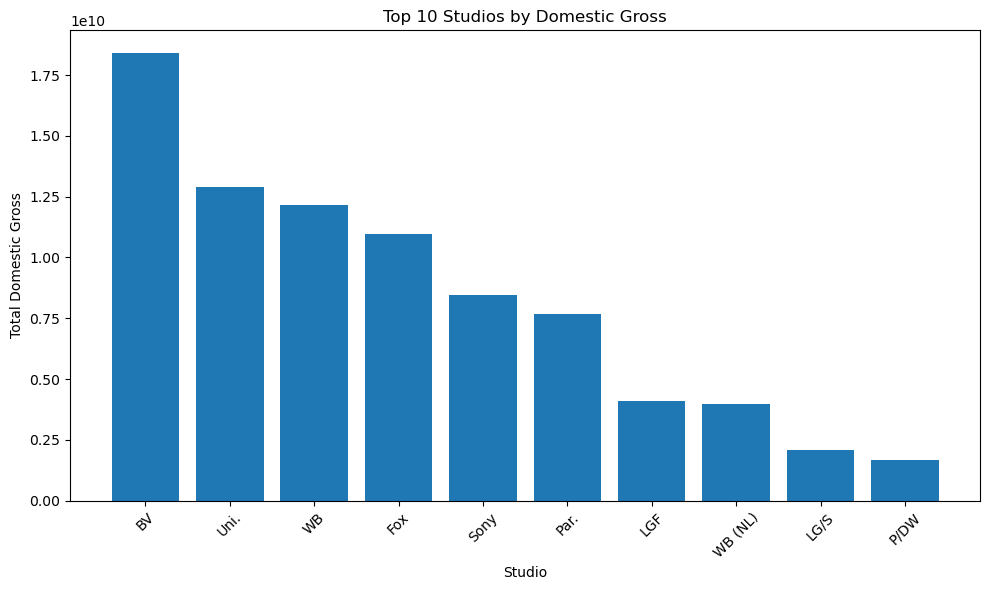

In [109]:
#Comparative Analysis by Studio
studio_performance = bom_gross_df.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False).head(10)

# Create a bar chart for studio performance
plt.figure(figsize=(10, 6))
plt.bar(studio_performance.index, studio_performance.values)
plt.title('Top 10 Studios by Domestic Gross')
plt.xlabel('Studio')
plt.ylabel('Total Domestic Gross')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [110]:
#Install seaborn
#pip install seaborn
#Import Seaborn
import seaborn as sns

In [111]:
#tn.movie_budgets.csv:
#Check for missing values.
#Identify any columns with irrelevant or redundant information.
movie_budgets_df.isnull().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [112]:
movie_budgets_df.duplicated().sum()

0

# 3. Merge the datasets to create a comprehensive dataset for analysis.

We will be combining these datasets, to create a unified dataset with comprehensive information about movies, including attributes, budget details, and box office performance. This consolidated dataset will serve as a powerful resource for generating insights and recommendations for Microsoft's new movie studio as they make decisions about the types of films to produce.

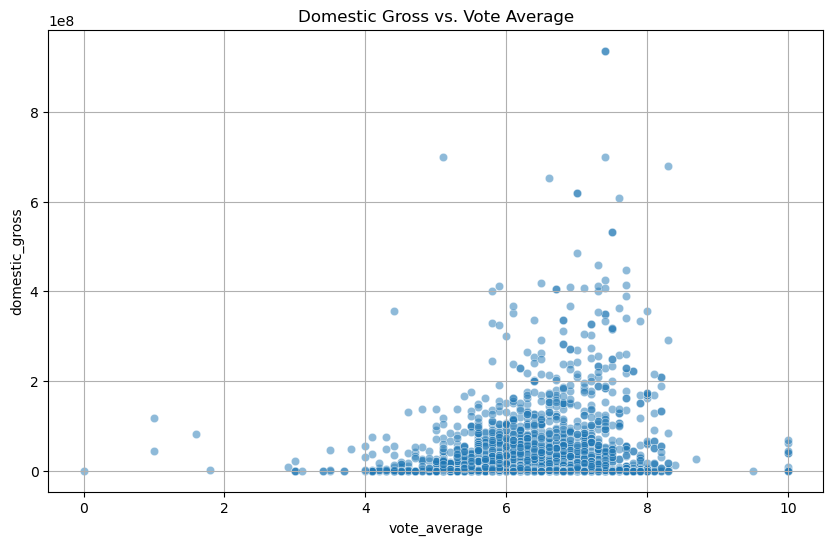

In [113]:
#We are going to explore the correlation between movie ratings (vote_average) and box office domestic gross
#We'll start by merging the tmdb dataset and the bom_grposs dataset

# Merge the DataFrames on a common column (e.g., original title)
merged_df = pd.merge(tmdb_df, bom_gross_df, left_on='original_title', right_on='title', how='inner')

# Create a scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vote_average', y='domestic_gross', data=merged_df, alpha=0.5)
plt.title('Domestic Gross vs. Vote Average')
plt.grid(True)
plt.show()

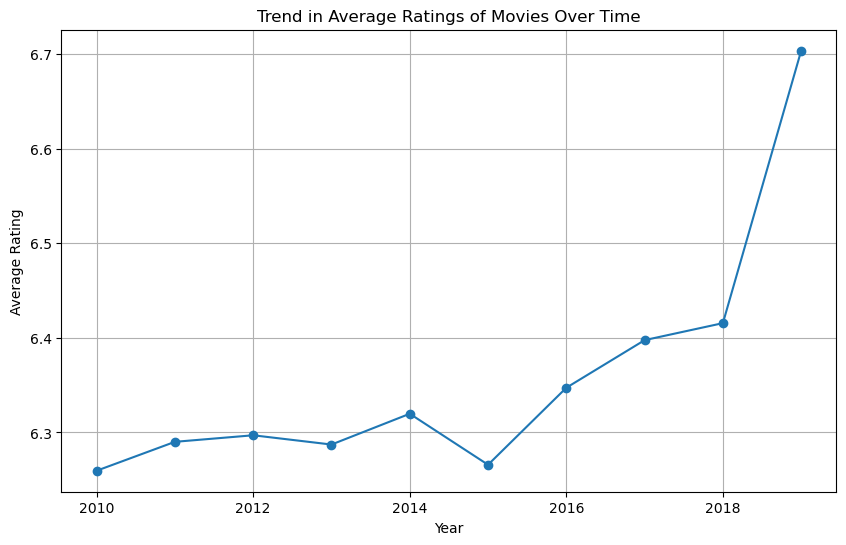

In [120]:
# Merge the movie basics and ratings dataframes on the movie ID
merged_df = pd.merge(movie_basics_df, movie_ratings_df, on='movie_id', how='inner')

# Group the data by year and calculate the average rating for each year
average_ratings_by_year = merged_df.groupby(merged_df['start_year'])['averagerating'].mean()

# Create a line graph to visualize the trend in average ratings over time
plt.figure(figsize=(10, 6))
plt.plot(average_ratings_by_year.index, average_ratings_by_year.values, marker='o')
plt.title('Trend in Average Ratings of Movies Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

Through the exploratory data analysis (EDA) of various datasets, we have gained valuable insights into the factors influencing a movie's success at the box office. We analyzed attributes such as popularity, average ratings, and vote counts, providing a comprehensive view of audience reception. Additionally, we conducted a comparative analysis of studios, genres, and release years to understand their impact on a movie's performance. By merging datasets, we created a unified dataset encompassing essential information about movies, including budget details and box office performance. This integrated dataset will serve as a valuable resource for Microsoft's new movie studio, guiding them in making informed decisions about the types of films to produce.

## Recommendations

Based on the analysis conducted in this project, I would recommend Microsoft to consider investing in genres that have shown consistent growth in popularity over the years, such as Documentary, drama and comedy. Additionally, exploring collaborations with studios that have a track record of producing high-grossing films could lead to more successful ventures. Furthermore, leveraging the power of data-driven insights, Microsoft can fine-tune production budgets to optimize financial returns. Lastly, prioritizing markets with a strong history of box office success, as identified in the analysis, can be a strategic move for maximizing revenue. By incorporating these insights into decision-making, Microsoft can enhance its position in the film industry.